# Clasification 1

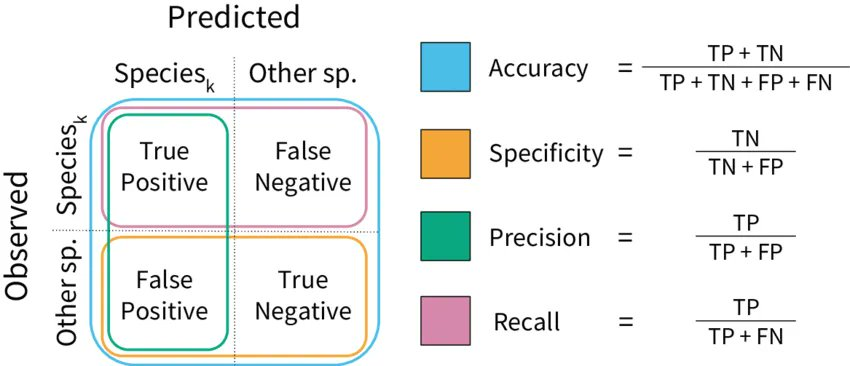

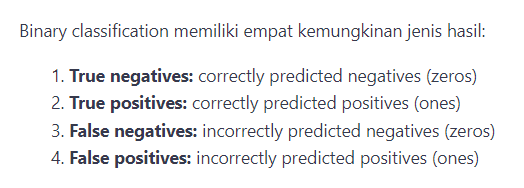

Kelas 1 dan 0

1 itu spam

0 bukan spam

True Positive = Predicted spam dan aktual spam

False Positive = Prediksi Spam dan Aktual bukan Spam

True Negative = Prediksi bukan spam dan aktual bukan spam

False Negative = Prediksi bukan spam ternyata aktual spam

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [3]:
model = LogisticRegression(solver='liblinear', random_state=2024)

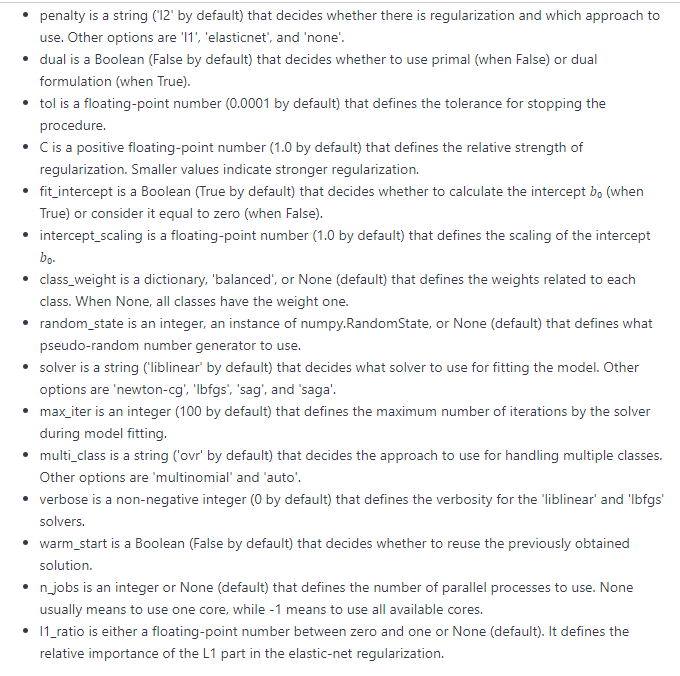

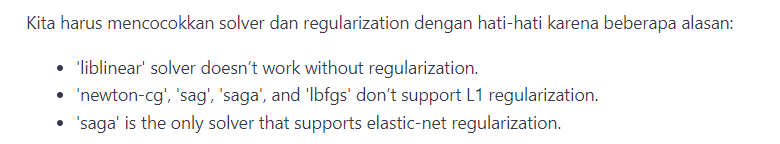

In [4]:
model.fit(x,y)

LogisticRegression(random_state=2024, solver='liblinear')

In [5]:
model.classes_

array([0, 1])

**Model diatas Binary Class**

In [6]:
print(model.intercept_,model.coef_) 

[-1.04608067] [[0.51491375]]


In [7]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [8]:
model.predict_proba(x)[:,1]

array([0.25997843, 0.37024476, 0.4959368 , 0.62214451, 0.73371907,
       0.82178499, 0.88527921, 0.92813018, 0.95577487, 0.97309431])

In [9]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [10]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [11]:
model.score(x,y)

0.9

In [12]:
y_pred = model.predict(x)

In [13]:
confusion_matrix(y,y_pred)

array([[3, 1],
       [0, 6]], dtype=int64)

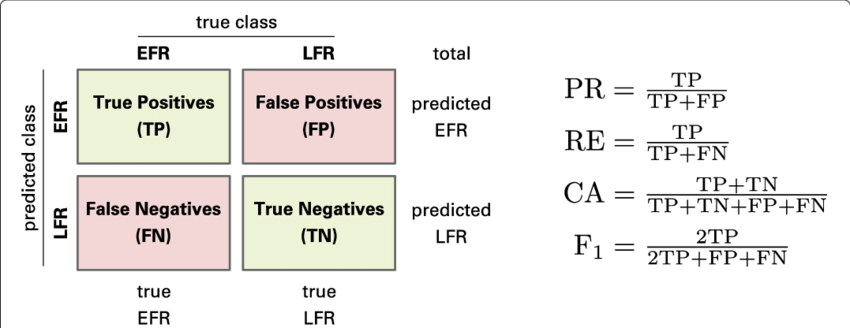

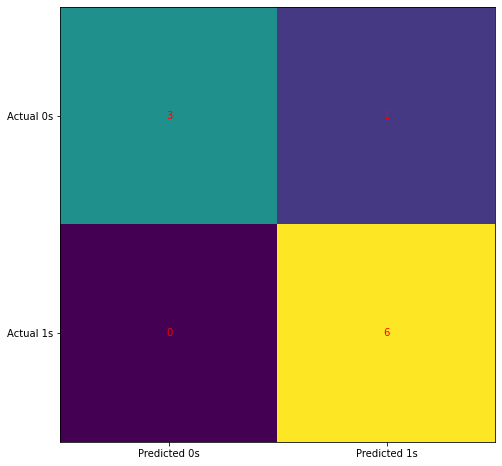

In [14]:
cm = confusion_matrix(y,y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [15]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [16]:
TP = 6
FP = 1
FN = 0
TN = 3

ACC =(TP+TN)/(TP+FP+FN+TN)
print(ACC)
PRE =(TP)/(TP+FP)
print(PRE)
REC =(TP)/(TP+FN)
print(REC)
F1 = (TP+TP)/(TP+TP+FP+FN)
print(F1)

0.9
0.8571428571428571
1.0
0.9230769230769231


## Model Improvement

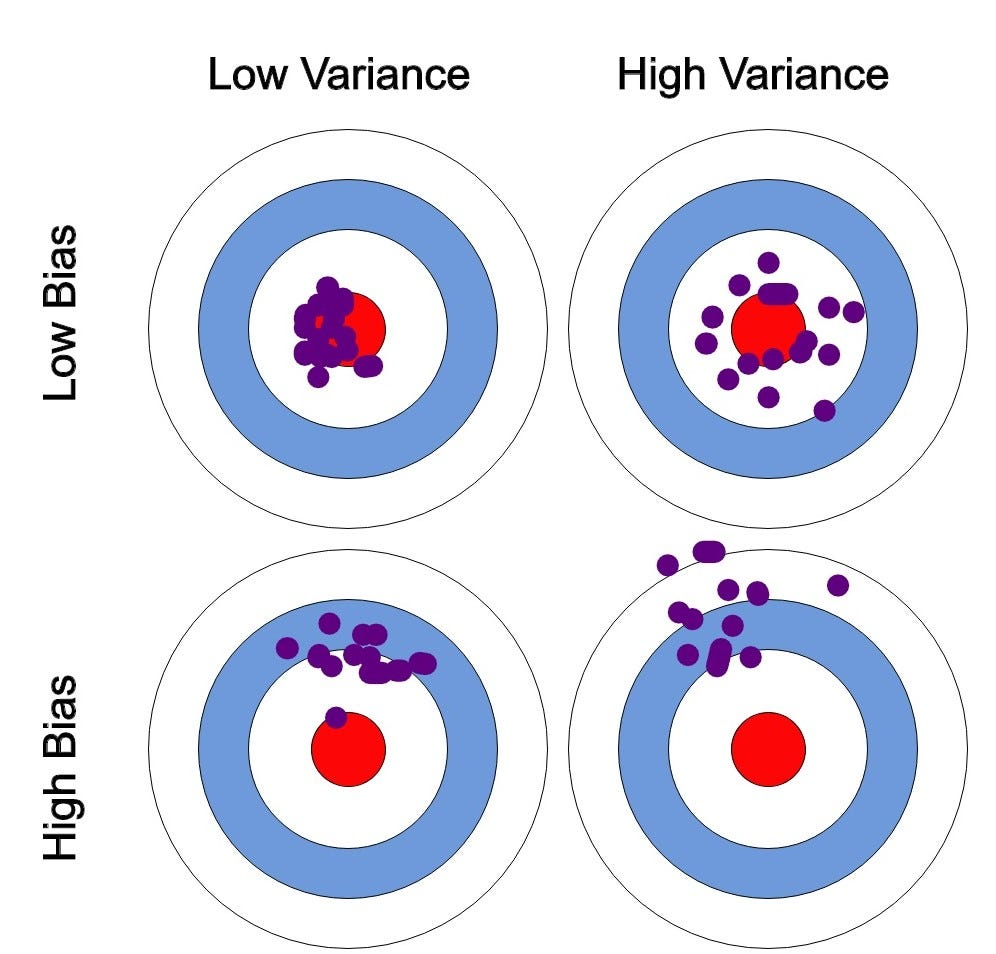

In [17]:
model_tuned = LogisticRegression(solver='liblinear', C=10, random_state=2024)
model_tuned.fit(x,y)

LogisticRegression(C=10, random_state=2024, solver='liblinear')

In [18]:
model_tuned.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [19]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [20]:
y_pred_tuned = model_tuned.predict(x)

In [21]:
confusion_matrix(y,y_pred_tuned)

array([[4, 0],
       [0, 6]], dtype=int64)

In [22]:
print(classification_report(y,y_pred_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
x,y = load_digits(return_X_y=True)

In [25]:
print(x,'\n', y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 
 [0 1 2 ... 8 9 8]


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2024)

In [27]:
x_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  1., 11., ..., 10.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ..., 16.,  2.,  0.],
       [ 0.,  1., 13., ..., 12.,  5.,  0.],
       [ 0.,  0.,  9., ...,  1.,  0.,  0.]])

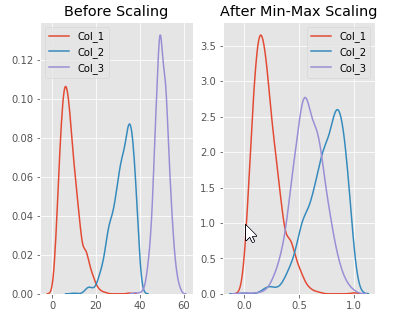

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
x_train

array([[ 0.        , -0.33352186, -1.08309284, ..., -1.15239353,
        -0.50473215, -0.20001015],
       [ 0.        , -0.33352186, -1.08309284, ...,  0.3727666 ,
        -0.50473215, -0.20001015],
       [ 0.        ,  0.75426009,  1.23166074, ...,  0.54222883,
        -0.50473215, -0.20001015],
       ...,
       [ 0.        , -0.33352186, -0.03093212, ...,  1.55900225,
        -0.01437931, -0.20001015],
       [ 0.        ,  0.75426009,  1.65252503, ...,  0.8811533 ,
         0.72114994, -0.20001015],
       [ 0.        , -0.33352186,  0.81079645, ..., -0.98293129,
        -0.50473215, -0.20001015]])

In [30]:
model = LogisticRegression(solver='liblinear', C=0.5, multi_class='ovr', random_state=2024)
model.fit(x_train,y_train)

LogisticRegression(C=0.5, multi_class='ovr', random_state=2024,
                   solver='liblinear')

In [31]:
model.score(x_train, y_train)

0.9829250185597624

In [32]:
model.score(x_test, y_test)

0.9488888888888889

In [33]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

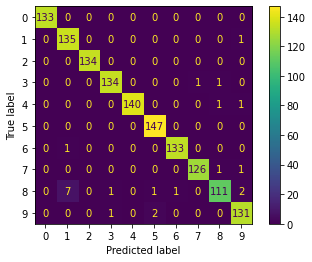

In [35]:
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [36]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       0.94      0.99      0.97       136
           2       1.00      1.00      1.00       134
           3       0.99      0.99      0.99       136
           4       1.00      0.99      0.99       142
           5       0.98      1.00      0.99       147
           6       0.99      0.99      0.99       134
           7       0.99      0.98      0.99       128
           8       0.97      0.90      0.94       123
           9       0.96      0.98      0.97       134

    accuracy                           0.98      1347
   macro avg       0.98      0.98      0.98      1347
weighted avg       0.98      0.98      0.98      1347

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.93      0.93      0.93        46
           2       0.96      1.00      0.98        43
           3       1.00 

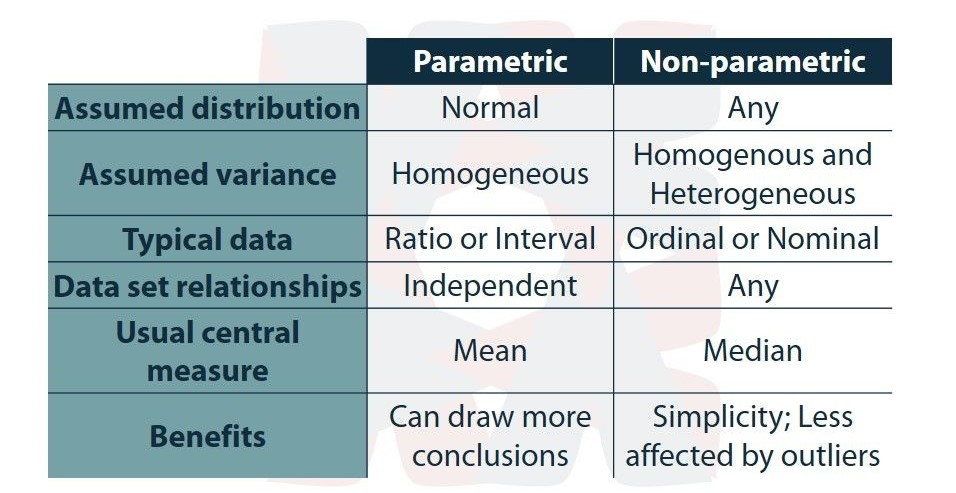

# K-Nearest Neighbour (KNN)

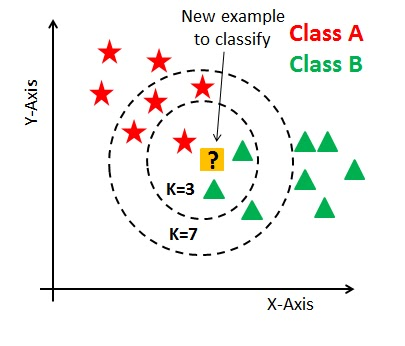

In [37]:
#Feature 1
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy',
          'Sunny','Overcast','Overcast','Rainy']
# Feature 2
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool',
       'Mild','Mild','Mild','Hot','Mild']

# Label atau target
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [38]:
print(len(weather),len(temp),len(play))

14 14 14


weather = Sunny:2, Rainny:1, Overcast:0
            
temp = Mild:2, Hot:1, Cool:0

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
weather_enc = le.fit_transform(weather)
temp_enc = le.fit_transform(temp)
play_enc = le.fit_transform(play)
print(temp_enc)
print(temp_enc)
print(play_enc)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [40]:
feature = list(zip(weather_enc,temp_enc))
feature

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [41]:
from sklearn.neighbors import KNeighborsClassifier
x = feature
y = play_enc
model = KNeighborsClassifier(n_neighbors=3) #n_neighbor adalah jumlah dari k

model.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

weather = Sunny:2, Rainny:1, Overcast:0
            
temp = Mild:2, Hot:1, Cool:0

play = Yes:1, No:0

Ketika kondisi OVercast dari Temperature Mild akan Play atau tidak

In [42]:
predicted = model.predict([[1,1]])
print(predicted)

[0]


In [43]:
y_pred = model.predict(x)

In [44]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



## KNN with Multiple Lables (Multiclass)

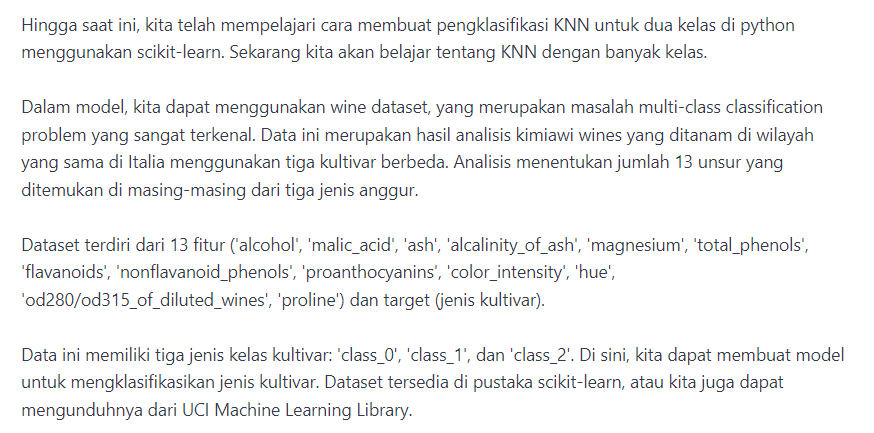

In [45]:
from sklearn.datasets import load_wine

In [46]:
wine = load_wine()

In [47]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [48]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [49]:
wine['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [50]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [51]:
wine['data'].shape

(178, 13)

In [52]:
wine['target'].shape

(178,)

In [53]:
import pandas as pd 
x = pd.DataFrame(wine['data'], columns=wine['feature_names'])

In [54]:
y = pd.DataFrame(wine['target'],columns=['kultivar'])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=2024)

Coba k =5

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [57]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train,y_train)

y_pred_7 = knn.predict(X_test)

C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [58]:
from sklearn.metrics import accuracy_score

print('Accuracy :', accuracy_score(y_test, y_pred_7))

Accuracy : 0.6481481481481481


In [65]:
error = []

# Kalkulasi error untuk k_values between 1 and 40

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i !=y_test['kultivar']))

C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [66]:
y_pred

array([2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 0, 1, 1])

In [67]:
np.mean(y_pred != y_test['kultivar'])

0.35185185185185186

Text(0, 0.5, 'Error rate')

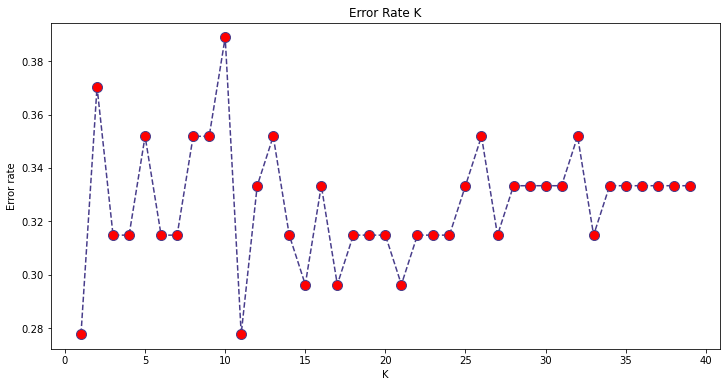

In [70]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='darkslateblue', linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error rate')

In [71]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train,y_train)

y_pred_11 = knn_11.predict(X_test)

print('Accuracy: ', accuracy_score(y_test,y_pred_11))

Accuracy:  0.7222222222222222


C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [72]:
scaler = StandardScaler()

In [73]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train_scaled,y_train)
y_pred_11_scaled = knn_11.predict(X_test_scaled)

print('Accuracy: ', accuracy_score(y_test,y_pred_11_scaled))

Accuracy:  0.9814814814814815


C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [75]:
y_pred_rain = knn_11.predict(X_train_scaled)
y_pred_test = knn_11.predict(X_test_scaled)

In [88]:
print('Test Set')
print(classification_report(y_test, y_pred_test))

Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.95      0.97        20
           2       0.94      1.00      0.97        16

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

